In [1]:
import sys
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.pyplot as plt
from PIL import Image, ImageSequence

# Original tif file reading

735
488


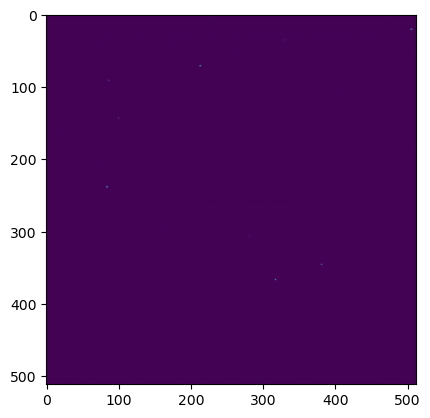

In [2]:
# ファイルパス
file_path = "../../Data/20240416/C1-beads_150424.tif"
Zcount = 735

# 画像を読み込み
img_pil = Image.open(file_path)
    # 画像データを取得
img_0=[]

i=0
for i in range(0,Zcount):
    img_pil.seek(i)
    image_data = np.array(img_pil)
    img_0.append(image_data)


plt.imshow(img_0[400])

# 画像情報の確認
print(len(img_0))
print(img_0[400][20][20])

img_pil.close()

# Linear increase setting

87.92234332425068
0.14941991809605656


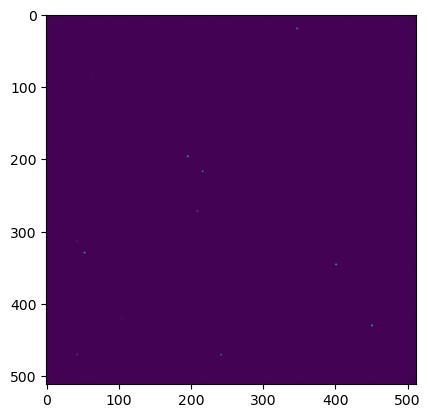

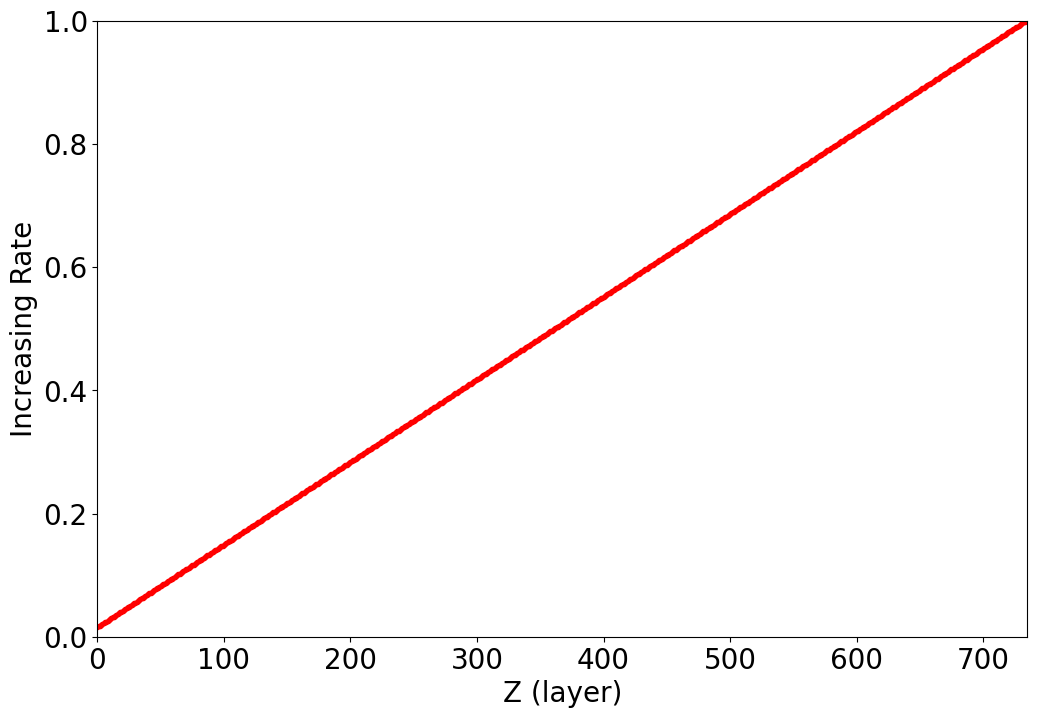

In [15]:
Imax0 = 2**16 - 1
ImaxZmax = 1000
dIdZ = (Imax0-ImaxZmax)/(Zcount-1)

print(dIdZ)

I=[]
img_p = []
for z in range(0,len(img_0)):
    I.append(dIdZ*z + ImaxZmax)
    img_p.append(np.uint16(img_0[z]*I[z]/Imax0))
    if z == 100:
        plt.imshow(np.uint16(img_0[z]*I[z]/Imax0))
        print(I[z]/Imax0)


plt.figure(figsize=(12, 8))
# plt.grid(color = "gray", linestyle="--")
# plt.legend( ) # add legend
# plt.subplot(221)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0,735)
plt.ylim(0,1)
plt.xlabel('Z (layer)', fontsize = 20) # x axis label
plt.ylabel('Increasing Rate', fontsize = 20) # y axis label
plt.plot(range(0,Zcount), np.array(I)/Imax0, ".",color="red")
plt.savefig("fig/Increasing Rate.jpg")
plt.show()

# File Writing

In [18]:
def saveTiffStack(save_path, imgs):
    """
    :param save_path: 画像を保存するパス
    :param imgs: 保存したい画像のnumpy.array  Ex)10枚の32x32のRGBに画像をtiffstackにしたい場合、 imgs.shape => (10, 32, 32, 3)
    :return:
    """
    stack = []
    for img in imgs:
        stack.append(Image.fromarray(img))
    stack[0].save(save_path, compression="tiff_deflate", save_all=True, append_images=stack[1:])

In [19]:
saveTiffStack("LinearIncrease.tif", img_p)

In [17]:
print(img_p[100])

[[68 66 68 ... 68 67 67]
 [69 68 68 ... 67 66 66]
 [66 67 66 ... 67 69 67]
 ...
 [64 65 67 ... 65 67 66]
 [68 67 65 ... 69 67 68]
 [68 68 67 ... 68 66 67]]


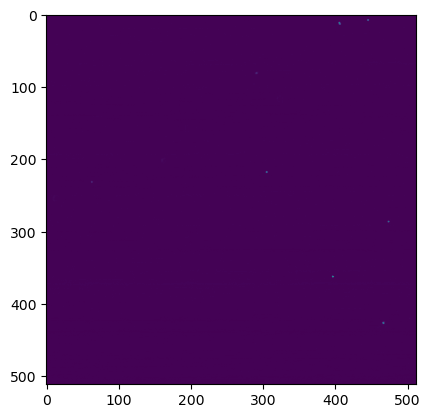

In [13]:
plt.imshow(img_p[700])